In [19]:
import numpy as np
import pandas as pd
import ast
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [20]:
movies_data = pd.read_csv('movies.csv')
credits_data = pd.read_csv('credits.csv') 

In [21]:
def extract_names_from_text(text):
    temp = []
    for i in ast.literal_eval(text):
        temp.append(i['name']) 
    return temp 

def director_name(text):
    temp = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            temp.append(i['name'])
    return temp 

def remove_spaces_from_list(x):
    temp = []
    for i in x:
        temp.append(i.replace(" ",""))
    return temp

def suggest(movie):
    index = movies_data_latest[movies_data_latest['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity_matrix[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(movies_data_latest.iloc[i[0]].title)


In [22]:
movies_data = movies_data.merge(credits_data,on='title')
movies_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [23]:
movies_data = movies_data[['movie_id','title','overview','genres','keywords','cast','crew']]
movies_data.dropna(inplace=True)

movies_data['genres'] = movies_data['genres'].apply(extract_names_from_text)
movies_data['keywords'] = movies_data['keywords'].apply(extract_names_from_text)
movies_data['cast'] = movies_data['cast'].apply(extract_names_from_text)

movies_data['cast'] = movies_data['cast'].apply(lambda x:x[0:3])
movies_data['crew'] = movies_data['crew'].apply(director_name)

movies_data['cast'] = movies_data['cast'].apply(remove_spaces_from_list)
movies_data['crew'] = movies_data['crew'].apply(remove_spaces_from_list)
movies_data['genres'] = movies_data['genres'].apply(remove_spaces_from_list)
movies_data['keywords'] = movies_data['keywords'].apply(remove_spaces_from_list)

movies_data['overview'] = movies_data['overview'].apply(lambda x:x.split())
movies_data['tags'] = movies_data['overview'] + movies_data['genres'] + movies_data['keywords'] + movies_data['cast'] + movies_data['crew']
movies_data_latest = movies_data.drop(columns=['overview','genres','keywords','cast','crew'])
movies_data_latest['tags'] = movies_data_latest['tags'].apply(lambda x: " ".join(x))

In [24]:
movies_data_latest.tail(5)

,movie_id,title,tags
4804,9367,El Mariachi,El Mariachi just wants to play his guitar and ...
4805,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...
4806,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic..."
4807,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...
4808,25975,My Date with Drew,Ever since the second grade when he first saw ...


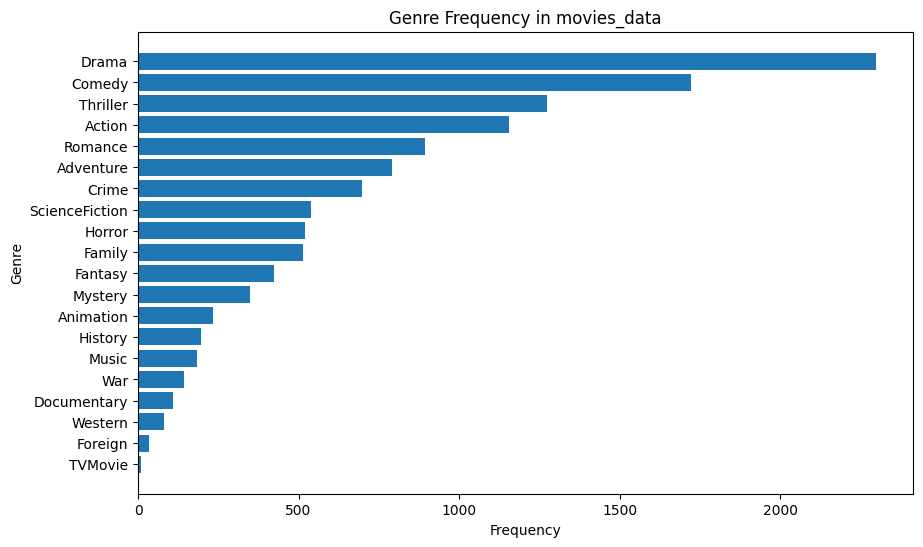

In [25]:
genre_counts = Counter([genre for genres in movies_data['genres'] for genre in genres])
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(genre_df['Genre'], genre_df['Count'])
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.title('Genre Frequency in movies_data')
plt.gca().invert_yaxis()
plt.show()

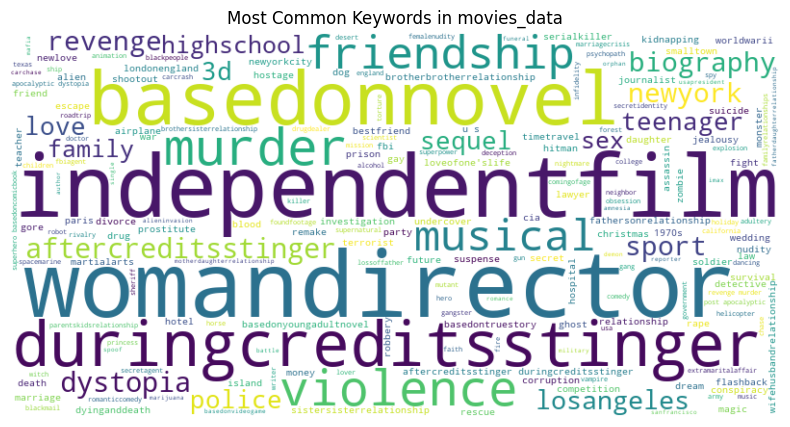

In [26]:
all_keywords = ' '.join([' '.join(keywords) for keywords in movies_data['keywords']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Keywords in movies_data')
plt.show()

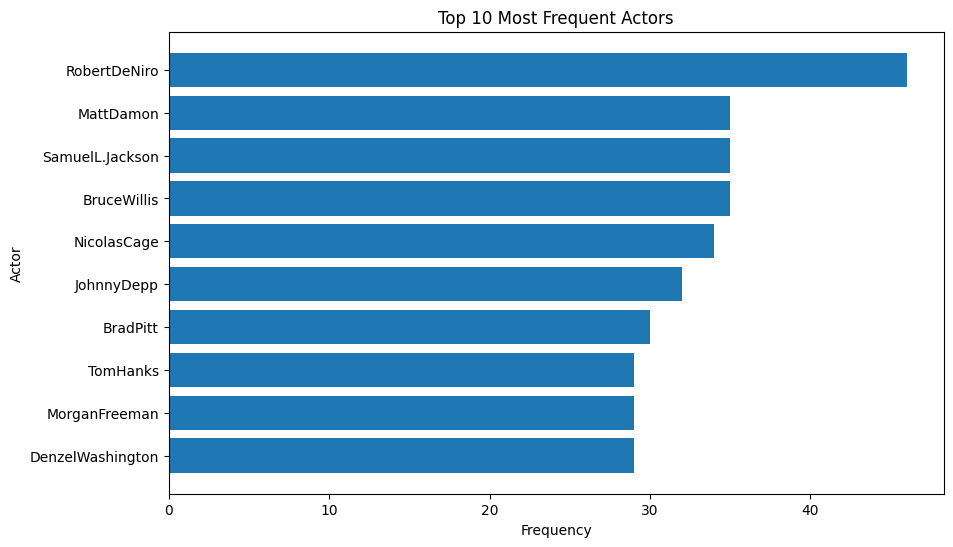

In [9]:
actor_counts = Counter([actor for cast in movies_data['cast'] for actor in cast])
actor_df = pd.DataFrame(actor_counts.items(), columns=['Actor', 'Count']).sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(actor_df['Actor'], actor_df['Count'])
plt.xlabel('Frequency')
plt.ylabel('Actor')
plt.title('Top 10 Most Frequent Actors')
plt.gca().invert_yaxis()  # highest frequency on top
plt.show()

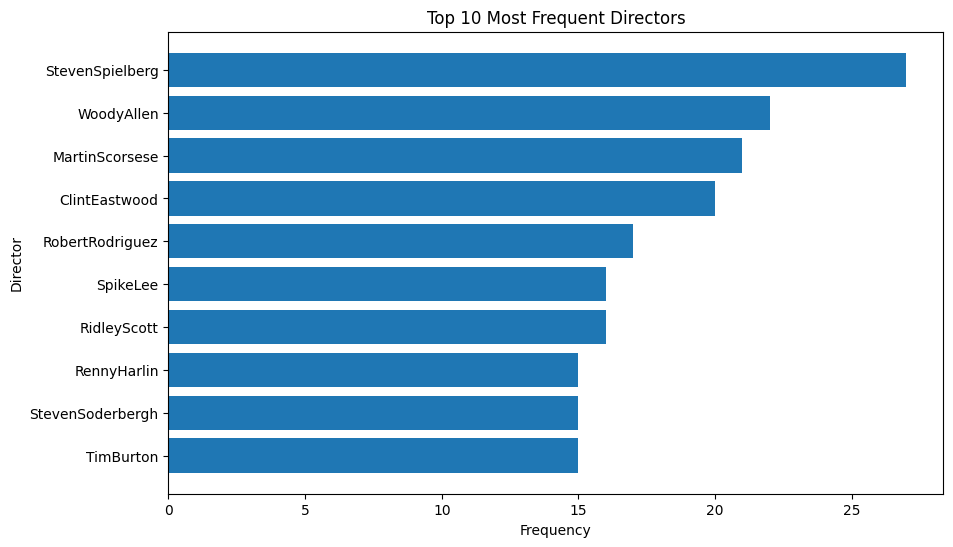

In [10]:
director_counts = Counter([director for crew in movies_data['crew'] for director in crew])
director_df = pd.DataFrame(director_counts.items(), columns=['Director', 'Count']).sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(director_df['Director'], director_df['Count'])
plt.xlabel('Frequency')
plt.ylabel('Director')
plt.title('Top 10 Most Frequent Directors')
plt.gca().invert_yaxis()
plt.show()

In [11]:
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
tag_vectors = vectorizer.fit_transform(movies_data_latest['tags']).toarray()
similarity_matrix = cosine_similarity(tag_vectors)
suggest('Avatar')

Titan A.E.
Small Soldiers
Ender's Game
Aliens vs Predator: Requiem
Independence Day


In [12]:
ground_truth = {
    'Gandhi': ['Gandhi, My Father', 'A Passage to India', 'Guiana 1838', 'The Wind That Shakes the Barley'],
    'Avatar': ['John Carter', 'The Matrix', 'Interstellar', 'Guardians of the Galaxy']
}

def calculate_precision_recall(movie, recommended_movies_data, ground_truth):
    relevant_movies_data = ground_truth.get(movie, [])
    true_positives = set(recommended_movies_data).intersection(relevant_movies_data)
    precision = len(true_positives) / len(recommended_movies_data) if recommended_movies_data else 0
    recall = len(true_positives) / len(relevant_movies_data) if relevant_movies_data else 0
    
    return precision, recall

def suggest(movie):
    index = movies_data_latest[movies_data_latest['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity_matrix[index])), reverse=True, key=lambda x: x[1])
    recommended_movies_data = [movies_data_latest.iloc[i[0]].title for i in distances[1:6]]  
    return recommended_movies_data

input_movie = 'Gandhi'
suggested = suggest(input_movie)
precision, recall = calculate_precision_recall(input_movie, suggested, ground_truth)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.80
Recall: 1.00


In [13]:
pickle.dump(movies_data_latest,open('movies.pkl','wb'))
pickle.dump(movies_data_latest,open('similarity_matrix.pkl','wb'))